In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X['species'] = y

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred= knn.predict(X_test_scaled)

In [6]:
creport = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [7]:
print(f"Accuracy:\n{accuracy*100}%\nClassification Report:\n{creport}")

Accuracy:
100.0%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



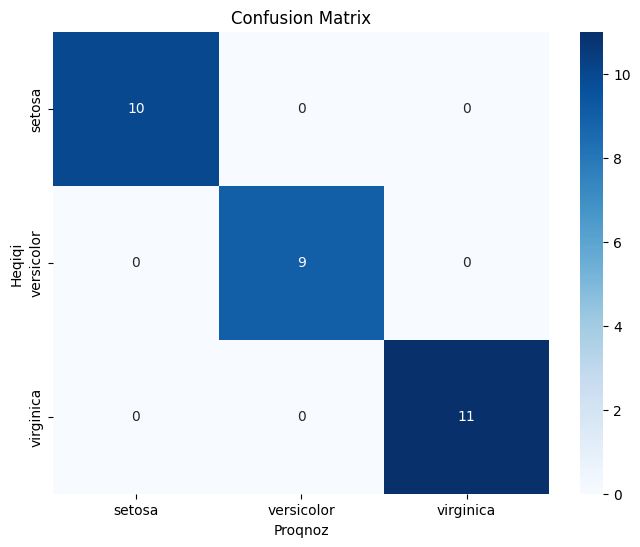

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels= data.target_names, yticklabels= data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Proqnoz')
plt.ylabel('Heqiqi')
plt.show()

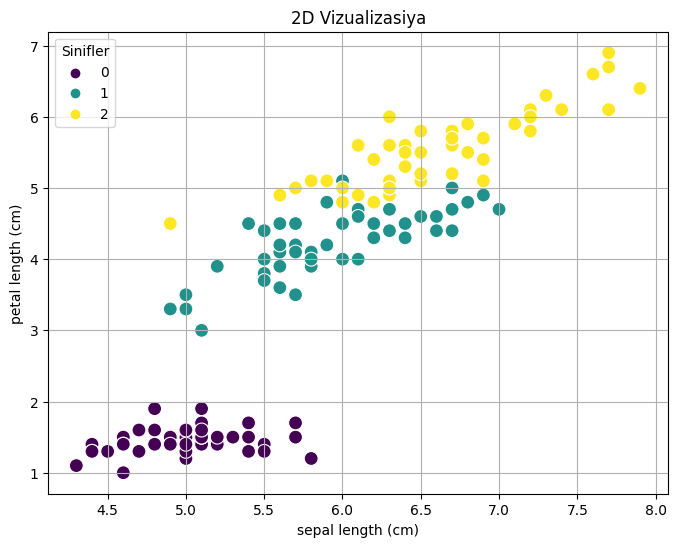

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= X.iloc[:,0], y = X.iloc[:,2], hue = X['species'], palette='viridis', s=100)
plt.title("2D Vizualizasiya")
plt.legend(title='Sinifler')
plt.grid()
plt.show()